In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

### Analyzing U.S. Treasury Premium (by Maturity)

In [2]:
df_US_Trsy_1Y = pd.read_csv('Output/Average_US_Tresury_Premium_1Y.csv')
df_US_Trsy_5Y = pd.read_csv('Output/Average_US_Tresury_Premium_5Y.csv')
df_US_Trsy_10Y = pd.read_csv('Output/Average_US_Tresury_Premium_10Y.csv')

In [3]:
# Renaming the columns for easing the analysis

df_US_Trsy_1Y = df_US_Trsy_1Y.rename(columns={'Avg_Premium':'1Y_Premium', 'Avg_Adj_Tau_Premium':'1Y_LIBOR_Adj'}).set_index('Date')
df_US_Trsy_5Y = df_US_Trsy_5Y.rename(columns={'Avg_Premium':'5Y_Premium', 'Avg_Adj_Tau_Premium':'5Y_LIBOR_Adj'}).set_index('Date')
df_US_Trsy_10Y = df_US_Trsy_10Y.rename(columns={'Avg_Premium':'10Y_Premium', 'Avg_Adj_Tau_Premium':'10Y_LIBOR_Adj'}).set_index('Date')

In [4]:
from functools import reduce

dfs_US_Tresy = [df_US_Trsy_1Y,df_US_Trsy_5Y,df_US_Trsy_10Y]

df_US_Trsy_All_Mat = reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True, how='outer'), dfs_US_Tresy).reset_index()
df_US_Trsy_All_Mat

,Date,1Y_Premium,1Y_LIBOR_Adj,5Y_Premium,5Y_LIBOR_Adj,10Y_Premium,10Y_LIBOR_Adj
0,2000-01-19,1.072546,1.000904,0.882152,0.789368,0.762611,0.689924
1,2000-01-20,1.074539,1.002897,0.879904,0.785620,0.761512,0.688825
2,2000-01-21,1.072950,1.001161,0.878039,0.782254,0.760846,0.685945
3,2000-01-24,1.078985,1.007196,0.879550,0.782266,0.763401,0.686286
4,2000-01-25,1.090693,1.018754,0.882110,0.783326,0.766152,0.686823
...,...,...,...,...,...,...,...
5794,2022-04-05,0.163810,0.059264,-0.211992,-0.241708,-0.137740,-0.157583
5795,2022-04-06,0.164965,0.058683,-0.210445,-0.240560,-0.140300,-0.160277
5796,2022-04-07,0.165236,0.056872,-0.209845,-0.240389,-0.144021,-0.164122
5797,2022-04-08,0.166090,0.056190,-0.210634,-0.241418,-0.149364,-0.169376


In [5]:
df_US_Trsy_All_Mat

,Date,1Y_Premium,1Y_LIBOR_Adj,5Y_Premium,5Y_LIBOR_Adj,10Y_Premium,10Y_LIBOR_Adj
0,2000-01-19,1.072546,1.000904,0.882152,0.789368,0.762611,0.689924
1,2000-01-20,1.074539,1.002897,0.879904,0.785620,0.761512,0.688825
2,2000-01-21,1.072950,1.001161,0.878039,0.782254,0.760846,0.685945
3,2000-01-24,1.078985,1.007196,0.879550,0.782266,0.763401,0.686286
4,2000-01-25,1.090693,1.018754,0.882110,0.783326,0.766152,0.686823
...,...,...,...,...,...,...,...
5794,2022-04-05,0.163810,0.059264,-0.211992,-0.241708,-0.137740,-0.157583
5795,2022-04-06,0.164965,0.058683,-0.210445,-0.240560,-0.140300,-0.160277
5796,2022-04-07,0.165236,0.056872,-0.209845,-0.240389,-0.144021,-0.164122
5797,2022-04-08,0.166090,0.056190,-0.210634,-0.241418,-0.149364,-0.169376


In [6]:
df_US_Trsy_All_Mat.dtypes

Date              object
1Y_Premium       float64
1Y_LIBOR_Adj     float64
5Y_Premium       float64
5Y_LIBOR_Adj     float64
10Y_Premium      float64
10Y_LIBOR_Adj    float64
dtype: object

In [7]:
#Converting the Date to datetime

df_US_Trsy_All_Mat["Date"]=pd.to_datetime(df_US_Trsy_All_Mat["Date"])

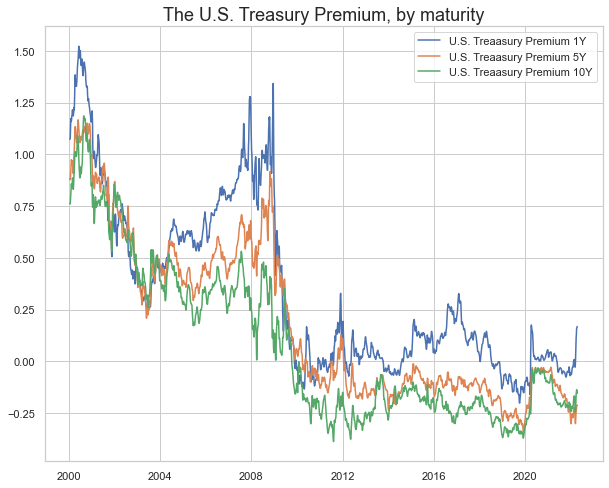

In [8]:
# Figure-4 of the Research Paper

plt.figure(figsize=(10,8))
plt.plot(df_US_Trsy_All_Mat['Date'], df_US_Trsy_All_Mat['1Y_Premium'], label='U.S. Treaasury Premium 1Y')
plt.plot(df_US_Trsy_All_Mat['Date'], df_US_Trsy_All_Mat['5Y_Premium'], label='U.S. Treaasury Premium 5Y')
plt.plot(df_US_Trsy_All_Mat['Date'], df_US_Trsy_All_Mat['10Y_Premium'], label='U.S. Treaasury Premium 10Y')
plt.legend()
plt.title('The U.S. Treasury Premium, by maturity', fontsize=18)
plt.savefig("Output/Fig_4_US_Treasury_Premiums_by_maturity.jpg")
plt.show()

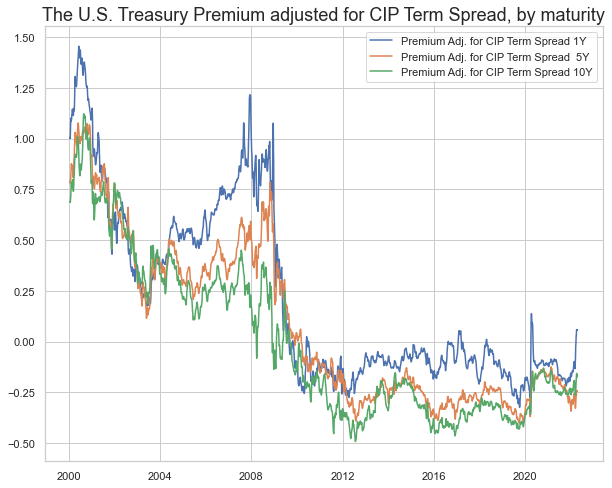

In [9]:
# Extension of the Figure-4 of the Research Paper for LIBOR adjustments

plt.figure(figsize=(10,8))
plt.plot(df_US_Trsy_All_Mat['Date'], df_US_Trsy_All_Mat['1Y_LIBOR_Adj'], label='Premium Adj. for CIP Term Spread 1Y')
plt.plot(df_US_Trsy_All_Mat['Date'], df_US_Trsy_All_Mat['5Y_LIBOR_Adj'], label='Premium Adj. for CIP Term Spread  5Y')
plt.plot(df_US_Trsy_All_Mat['Date'], df_US_Trsy_All_Mat['10Y_LIBOR_Adj'], label='Premium Adj. for CIP Term Spread 10Y')
plt.legend()
plt.title('The U.S. Treasury Premium adjusted for CIP Term Spread, by maturity', fontsize=18)
plt.show()

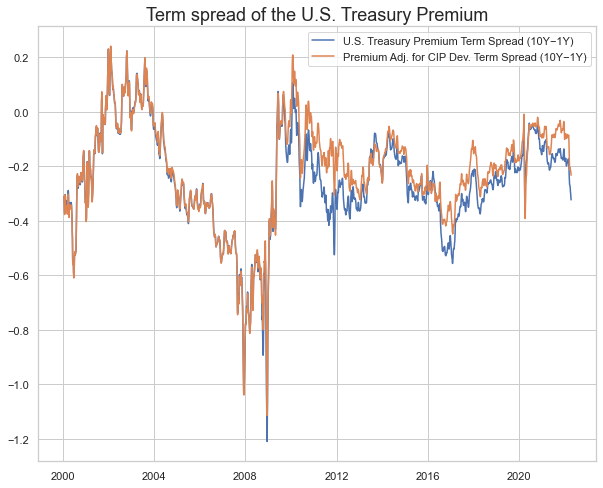

In [9]:
#Figure-5

'''
1. The term spread becomes negative for all three premium measures post-GFC.

2. Therefore, we find that even though medium- to-long-term U.S. Treasuries have lost their specialness relative to other near-defaultfree government bonds since the GFC, short-dated U.S. Treasury bills
still command a sizable premium.
'''

df_US_Trsy_All_Mat['Premium_Spread_10Y_1Y'] = df_US_Trsy_All_Mat['10Y_Premium'] - df_US_Trsy_All_Mat['1Y_Premium']
df_US_Trsy_All_Mat['LIBOR_Adj_Premium_Spread_10Y_1Y'] = df_US_Trsy_All_Mat['10Y_LIBOR_Adj'] - df_US_Trsy_All_Mat['1Y_LIBOR_Adj']

plt.figure(figsize=(10,8))
plt.plot(df_US_Trsy_All_Mat['Date'], df_US_Trsy_All_Mat['Premium_Spread_10Y_1Y'], label='U.S. Treasury Premium Term Spread (10Y−1Y)')
plt.plot(df_US_Trsy_All_Mat['Date'], df_US_Trsy_All_Mat['LIBOR_Adj_Premium_Spread_10Y_1Y'], label='Premium Adj. for CIP Dev. Term Spread (10Y−1Y)')
plt.legend()
plt.title('Term spread of the U.S. Treasury Premium', fontsize=18)
plt.savefig("Output/Fig_5_Term-Spread-US_Treasury_Premium.jpg")
plt.show()